## Importing Required Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use("tableau-colorblind10")

## Load Dataset

In [2]:
# Loading And Reading Dataset
df = pd.read_csv("data/data.csv")
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


## Undersatnding Dataset

In [3]:
# Checking the shape of the dataset
df.shape

(145366, 2)

In [4]:
# Checking the duplicate Records
df.duplicated().sum()

0

In [5]:
# Checking for missing values
df.isna().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [6]:
# Checking the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [7]:
# Indexing Dataset
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)
df.sample()

,PJME_MW
Datetime,
2006-03-08 05:00:00,29552.0


In [8]:
# Checking the basic Statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PJME_MW,145366.0,32080.222831,6464.012166,14544.0,27573.0,31421.0,35650.0,62009.0


## Data Exploration

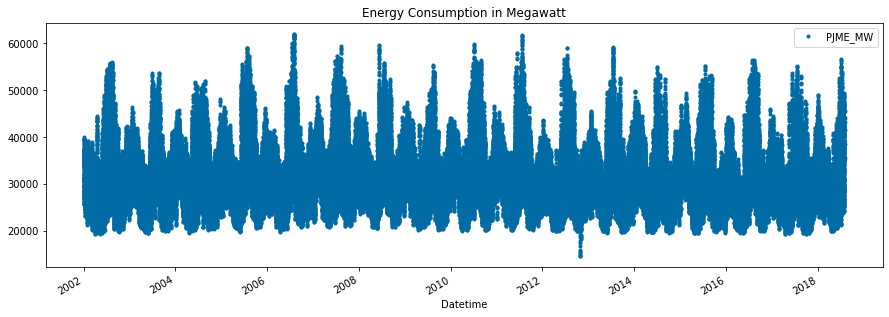

In [9]:
# Evolution Of Energy Use from 2002-2018
df.plot(style=".", figsize=(15, 5), title="Energy Consumption in Megawatt")
plt.show()

In [10]:
from pandas import DataFrame
from pandas.api.types import CategoricalDtype


def create_features(df: DataFrame) -> DataFrame:
    """
    Creates additional time-related features based on the index of a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to create features for.

    Returns:
        pandas.DataFrame: The input DataFrame with additional time-related features added.
    """
    df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    df["hour"] = df.index.hour  # Hour of the day (0-23)
    df["day_of_week"] = df.index.dayofweek  # Day of the week (Monday=0, Sunday=6)
    df["quarter"] = df.index.quarter  # Quarter of the year (1-4)
    df["month"] = df.index.month  # Month of the year (1-12)
    df["year"] = df.index.year  # Year
    df[
        "day_of_year"
    ] = df.index.dayofyear  # Day of the year (1-365 or 1-366 for leap years)
    df["day_of_month"] = df.index.day  # Day of the month (1-31)
    df[
        "week_of_year"
    ] = df.index.isocalendar().week  # ISO week number of the year (1-53)
    return df


df1 = create_features(df)  # Create new DataFrame with additional time-related features
df1.head()  # Print the first few rows of the new DataFrame

,PJME_MW,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1


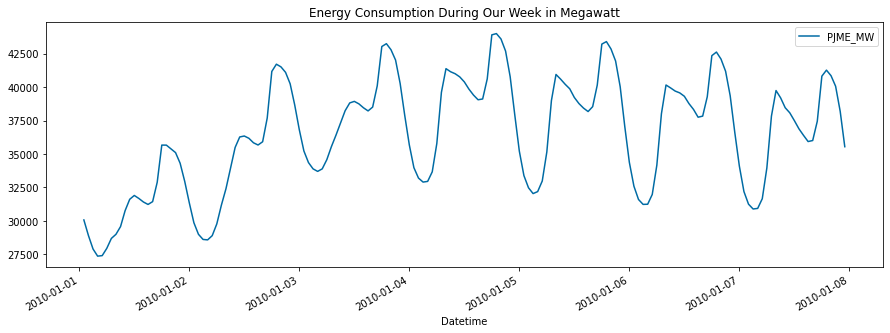

In [11]:
# Evolution Of the Time series during the Week 01-01-2010 / 01-08-2010
En_Week = df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")]
En_Week.plot(figsize=(15, 5), title="Energy Consumption During Our Week in Megawatt")
plt.show()

In [12]:
# Years With The Highest Energy Consumption in Megawatt
df_year = df1.groupby(["year"]).sum()["PJME_MW"]
df_year.sort_values(ascending=False).head()

year
2007    294386758.0
2005    291733172.0
2010    289866969.0
2008    289187689.0
2006    283840384.0
Name: PJME_MW, dtype: float64

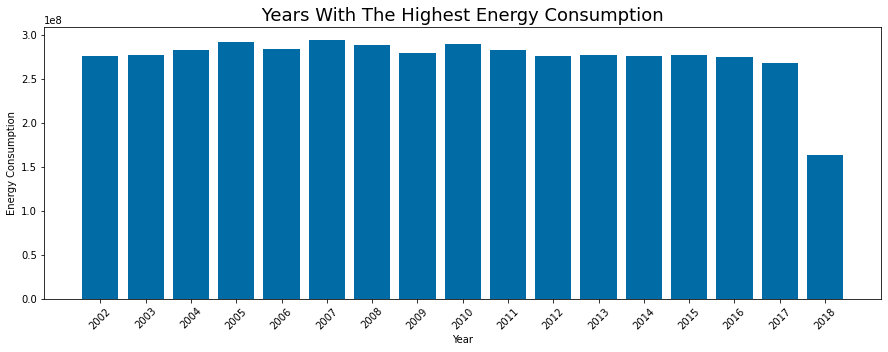

In [13]:
# Years With The Highest Energy Consumption in Megawatt
Year_ = range(2002, 2019)
plt.figure(figsize=(15, 5))
plt.bar(Year_, df_year)
plt.xticks(Year_)
plt.ylabel("Energy Consumption")
plt.xlabel("Year")
plt.title(" Years With The Highest Energy Consumption ", fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [14]:
# Months With The Highest Energy Consumption in Megawatt
df_month = df1.groupby(["month"]).sum()["PJME_MW"]
df_month.sort_values(ascending=False).head()

month
7     479131193.0
8     437431506.0
1     434339038.0
6     413856422.0
12    388945376.0
Name: PJME_MW, dtype: float64

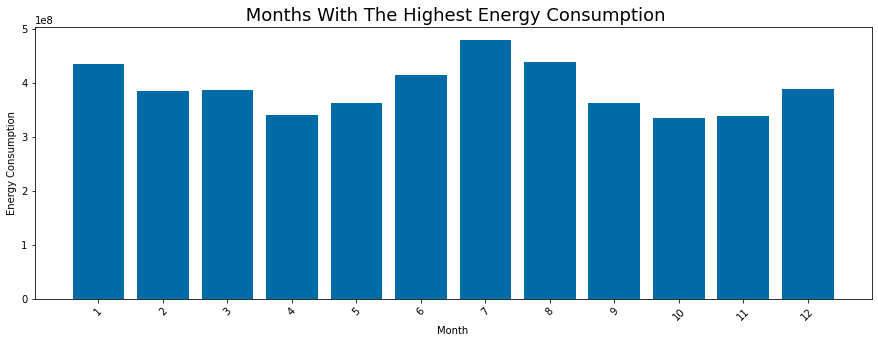

In [15]:
# Months With The Highest Energy Consumption in Megawatt
month_ = range(1, 13)
plt.figure(figsize=(15, 5))
plt.bar(month_, df_month)
plt.xticks(month_)
plt.ylabel("Energy Consumption")
plt.xlabel("Month")
plt.title(" Months With The Highest Energy Consumption", fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [16]:
# Hours With The Highest Energy Consumption in Megawatt
df_hour = df1.groupby(["hour"]).sum()["PJME_MW"]
df_hour.sort_values(ascending=False).head()

hour
19    220672524.0
18    220644061.0
20    218735238.0
21    216519325.0
17    215640880.0
Name: PJME_MW, dtype: float64

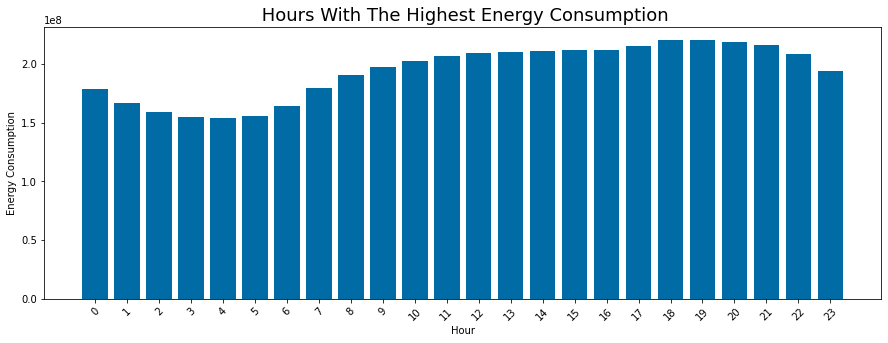

In [17]:
# Hours With The Highest Energy Consumption in Megawatt
hour_ = range(0, 24)
plt.figure(figsize=(15, 5))
plt.bar(hour_, df_hour)
plt.xticks(hour_)
plt.ylabel("Energy Consumption")
plt.xlabel("Hour")
plt.title(" Hours With The Highest Energy Consumption", fontsize=18)
plt.xticks(rotation=45)
plt.show()

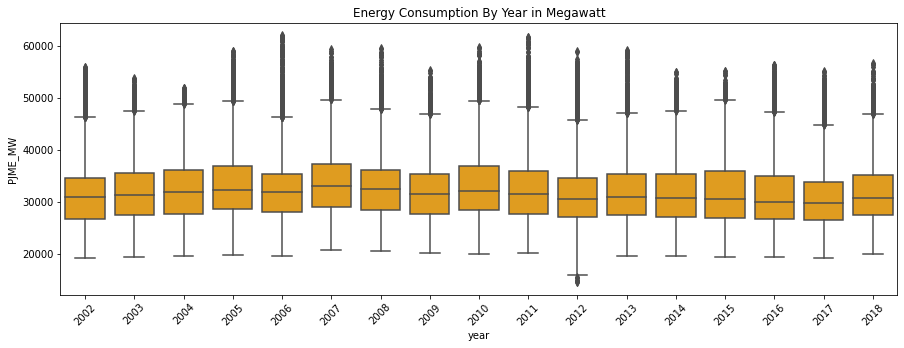

In [18]:
# Target Relationship
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1, x="year", y="PJME_MW", color="orange")
ax.set_title("Energy Consumption By Year in Megawatt")
plt.xticks(rotation=45)
plt.show()

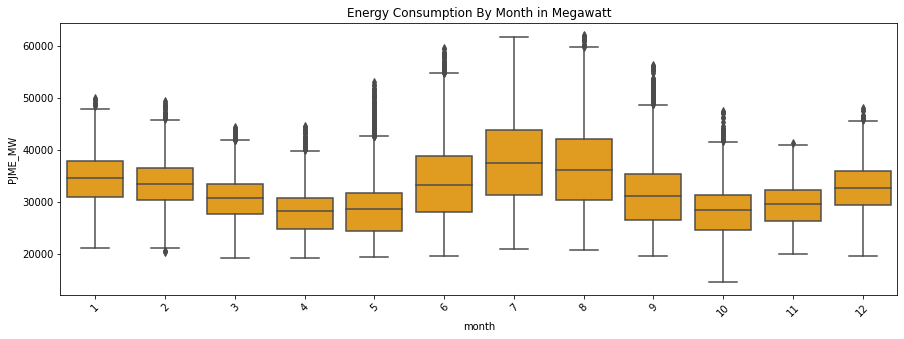

In [19]:
# Feature - Target Relationship
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1, x="month", y="PJME_MW", color="orange")
ax.set_title("Energy Consumption By Month in Megawatt")
plt.xticks(rotation=45)
plt.show()

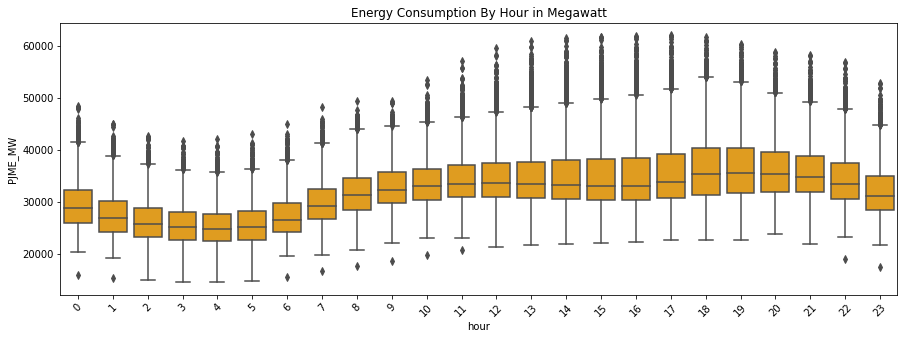

In [20]:
# Analysis : Feature - Target Relationship
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1, x="hour", y="PJME_MW", color="orange")
ax.set_title("Energy Consumption By Hour in Megawatt")
plt.xticks(rotation=45)
plt.show()

In [21]:
data = df1.drop(
    ["quarter", "day_of_year", "week_of_year", "day_of_month"], axis=1
).corr()
data.head()

,PJME_MW,hour,day_of_week,month,year
PJME_MW,1.000000,0.486303,-0.183058,-0.044522,-0.058505
hour,0.486303,1.000000,0.000317,-0.000049,-0.000131
day_of_week,-0.183058,0.000317,1.000000,-0.000086,-0.000035
month,-0.044522,-0.000049,-0.000086,1.000000,-0.043370
year,-0.058505,-0.000131,-0.000035,-0.043370,1.000000


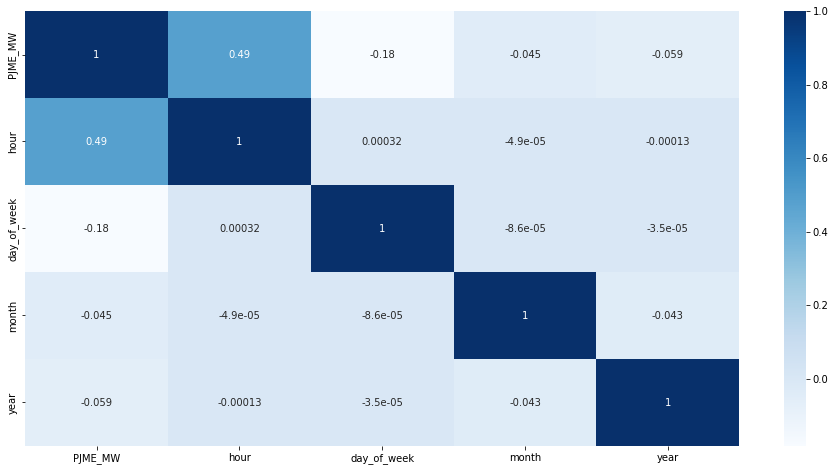

In [22]:
# Correlation Analysis
plt.figure(figsize=(16, 8))
sns.heatmap(data=data, annot=True, cmap="Blues")
plt.show()

## Data Splitting

In [23]:
# Train-Test split
train = df.loc[df.index < "01-01-2015"]
test = df.loc[df.index >= "01-01-2015"]

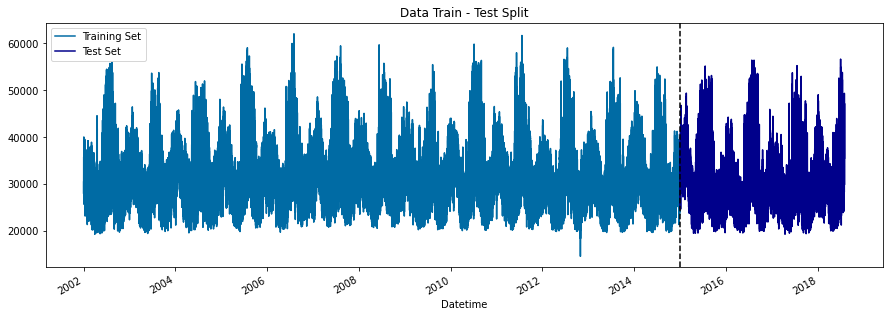

In [24]:
# Evolution Of Training Set and Test Set from 2002-2018
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label="Training Set", title="Data Train - Test Split")
test.plot(ax=ax, label="Test Set", color="darkblue")
ax.axvline("01-01-2015", color="black", ls="--")
ax.legend(["Training Set", "Test Set"])
plt.show()

## Model Building

In [25]:
import xgboost as xgb

# Create time-related features for train and test data
train = create_features(train)
test = create_features(test)

# Define the input features and target variable for the XGBoost model
FEATURES = ["day_of_year", "hour", "day_of_week", "quarter", "month", "year"]
TARGET = "PJME_MW"

# Split the train and test data into input features and target variable
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

# Define the XGBoost regressor model with hyperparameters
reg = xgb.XGBRegressor(
    base_score=0.5,
    booster="gbtree",
    n_estimators=1000,
    early_stopping_rounds=50,
    objective="reg:squarederror",
    max_depth=3,
    learning_rate=0.01,
)

# Fit the XGBoost model to the training data, and use early stopping with the test data
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:32605.13860	validation_1-rmse:31657.15907
[100]	validation_0-rmse:12581.21569	validation_1-rmse:11743.75114
[200]	validation_0-rmse:5835.12466	validation_1-rmse:5365.67709
[300]	validation_0-rmse:3915.75557	validation_1-rmse:4020.67023
[400]	validation_0-rmse:3443.16468	validation_1-rmse:3853.40423
[500]	validation_0-rmse:3285.33804	validation_1-rmse:3805.30176
[600]	validation_0-rmse:3201.92936	validation_1-rmse:3772.44933
[700]	validation_0-rmse:3148.14225	validation_1-rmse:3750.91108
[800]	validation_0-rmse:3109.24248	validation_1-rmse:3733.89713
[900]	validation_0-rmse:3079.40079	validation_1-rmse:3725.61224
[999]	validation_0-rmse:3052.73503	validation_1-rmse:3722.92257


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

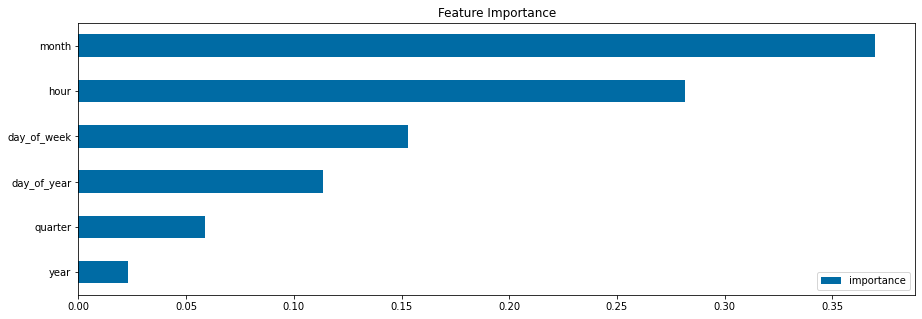

In [26]:
# Feature Importance
fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["importance"]
)

fi.sort_values("importance").plot(
    figsize=(15, 5), kind="barh", title="Feature Importance"
)
plt.show()

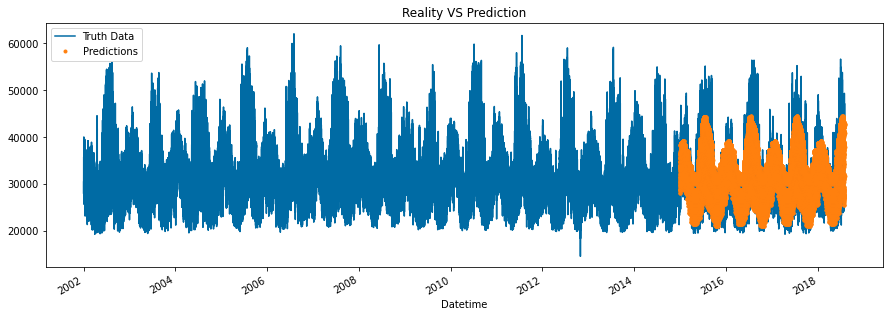

In [27]:
# Cheaking Test Forecasting
test["prediction"] = reg.predict(X_test)
df = df.merge(test[["prediction"]], how="left", left_index=True, right_index=True)
ax = df[["PJME_MW"]].plot(figsize=(15, 5))
df["prediction"].plot(ax=ax, style=".")
plt.legend(["Truth Data", "Predictions"])
ax.set_title("Reality VS Prediction")
plt.show()

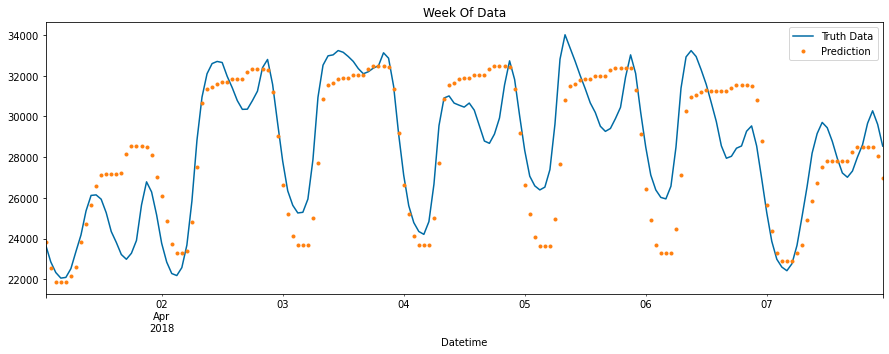

In [28]:
# Look at one week (04-01-2018/04-08-2018 ) of predictions
ax = df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["PJME_MW"].plot(
    figsize=(15, 5), title="Week Of Data"
)
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["prediction"].plot(
    style="."
)
plt.legend(["Truth Data", "Prediction"])
plt.show()

## Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test["error"] = np.abs(test[TARGET] - test["prediction"])
test["date"] = test.index.date

In [30]:
# MSE
mean_squared_error(y_true=test["PJME_MW"], y_pred=test["prediction"])

13851395.833873102

In [31]:
# RMSE
np.sqrt(mean_squared_error(test["PJME_MW"], test["prediction"]))

3721.746341957375

In [32]:
# MAE
mean_absolute_error(y_true=test["PJME_MW"], y_pred=test["prediction"])

2895.3947107213144